## C170 – Database Management -Applications
* Cady Wilson
* June 25, 2023

# Nora's Bagel Bin

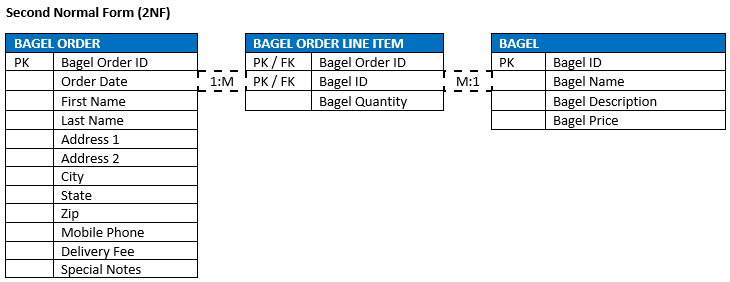

- The attributes have been assigned based on how an order might progress. The attributes that concern a single bagel type went into the Bagel Table. The Bagel Order table was assigned anything that would be part of a retail order. This includes not only the order itself, but the customer information of the person ordering. This would help in a delivery siturion or if someone needed clarification.

* I assigned the cardinality of `Bagel Order` to `Bagel Order Line Item` as 1:M, as a single order can contain many different bagels and quantities. I assigned `Bagel Order` to `Bagel` as M:1 as there may be several different bagels in an order, but each bagel type and it’s attributes are unique.

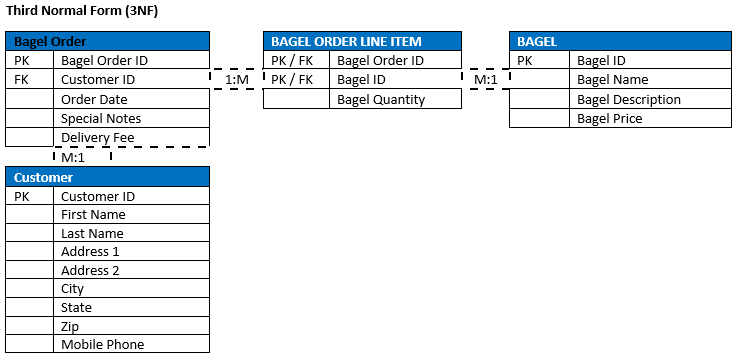

* To put the table into 3NF I kept the relationships largely the same but separated customer specific data into a new table. This way the customer ID key is the only thing needed when a Bagel Order is placed. I made it a 1:M relationship, as one customer can make many orders, but multiple people can’t be lumped together for a single order.

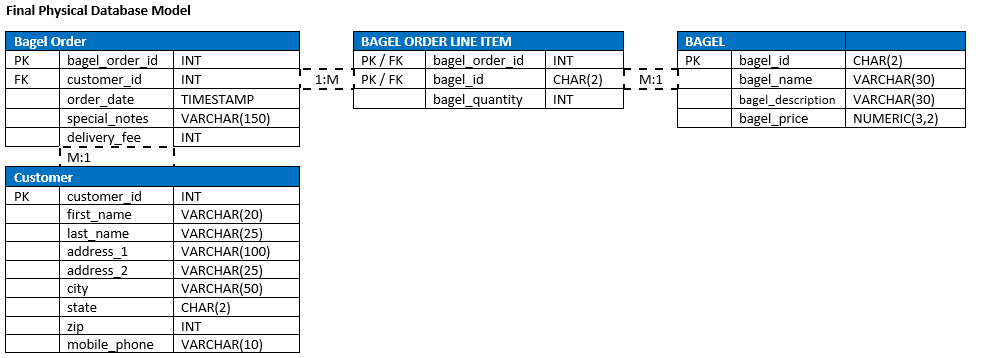

For the final model I corrected all the attribute names to the correct case and added the variable types for each one. 

* **Bagel Order Table:** Order Date is a TIMESTAMP type as it is the only variable that needs a date associated with it. I made special_notes a VARCHAR() as someone may or may not have any instructions or notes, and if they don’t need the whole amount it is saved without the extra space, making retrieval faster. I capped it at 150 because you don’t really need more than a sentence or 2 for some notes.

* **Bagel Order Item:** This is fairly self-explanatory, the number of bagels and the order ID will always be integers and bagel_id according to business rules appears to be capped at 2 characters.

* **Bagel:** The primary key of bagel_id remained the same, as it should. Bagel_name and bagel_description are VARCHAR(30) for the space saving reasons above, but also because the names have spaces in them. I capped it at 30 because too long of a name or description isn’t best business practice. Bagel_price I made NUMERIC(3,2) because all of the prices 3 digits, one for the dollar amount and the second for the cents to the hundredths.

* **Customer:** As there are varying lengths of names and addresses I made all of those VARCHAR() and capped them at what I determined to be an appropriate length for even the longest of names/addresses. State is CHAR(2) as it’s far easier and faster to put the 2 character length state abbreviation. Finally, mobile_phone is VARCHAR(10) for a 10 digit phone number. I didn’t make it 11 because the company only operates within the United States, and adding the international digit seemed superfluous. 


# **Jaunty Coffee**

### Creating the Tables

In [ ]:
CREATE TABLE Supplier (
  supplier_id INTEGER PRIMARY KEY,
    company_name VARCHAR(50),
    country VARCHAR(30),
    sales_contact_name VARCHAR(60),
    email	VARCHAR(50) NOT NULL
  );

In [ ]:
CREATE TABLE Coffee_Shop (
  shop_id INTEGER PRIMARY KEY,
  shop_name	VARCHAR(50),
  city VARCHAR(50),
  state	CHAR(2)
);

In [ ]:

CREATE TABLE Coffee (
  coffee_id	INTEGER PRIMARY KEY,
  shop_id INTEGER,
  supplier_id INTEGER,
  coffee_name VARCHAR(30),
  price_per_pound NUMERIC(5,2)
);

In [ ]:
CREATE TABLE Employee (
  employee_id INTEGER PRIMARY KEY,
  first_name VARCHAR(30),
  last_name	VARCHAR(30),
  hire_date	DATE,
  job_title	VARCHAR(30),
  shop_id INTEGER,
  FOREIGN KEY (shop_id) REFERENCES Coffee_Shop(shop_id)
);

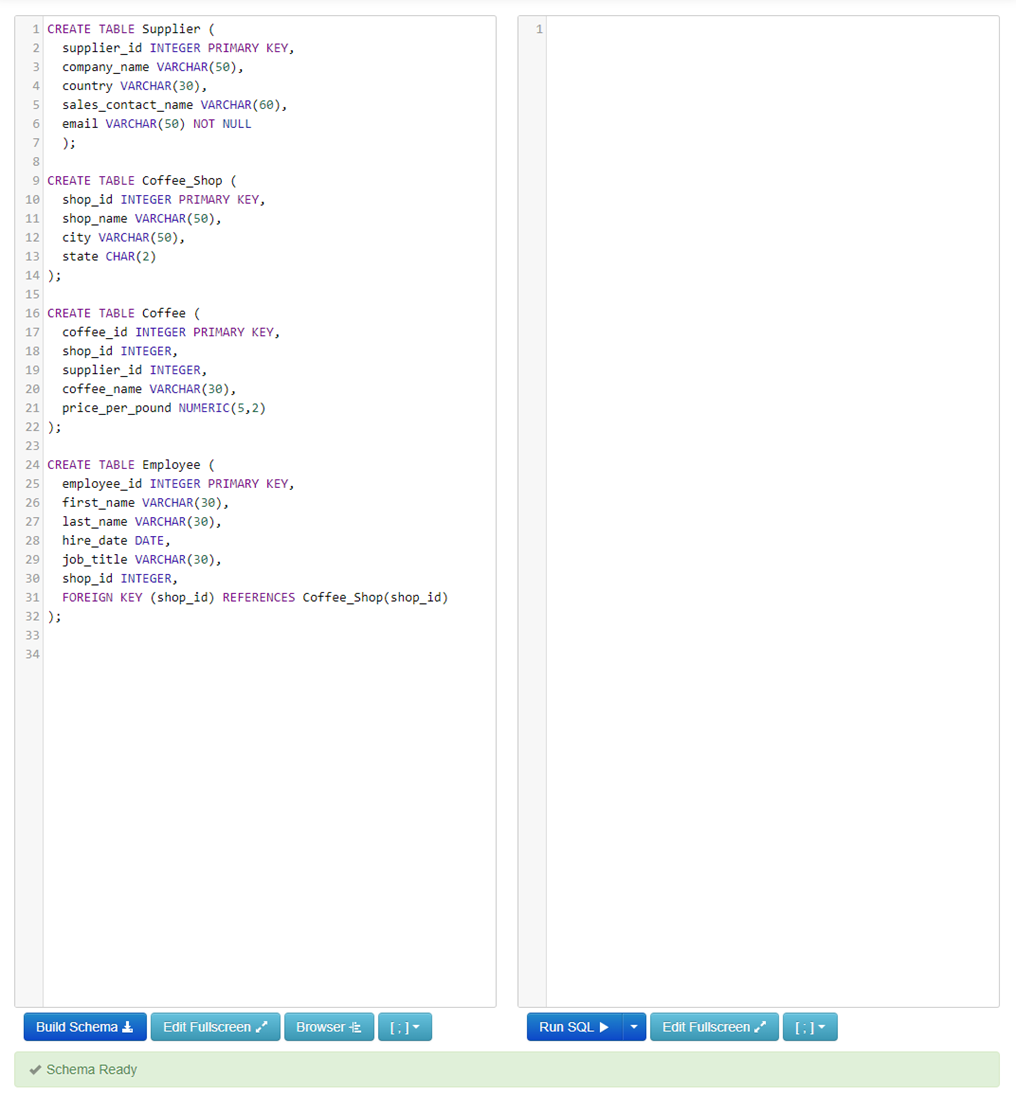

### Inserting Data into the tables

In [ ]:
INSERT INTO Supplier 
(supplier_id, company_name, country, sales_contact_name, email)
VALUES (13566, 'Moonbeam', 'USA', 'Caleb', 'caleb@moonbeam.com'),
(23998, 'Sparky', 'USA', 'Alex', 'alex@sparky.com'),
(47291, 'Pulp-it', 'Canada', 'Collin', 'collin@pulpit.com');

In [ ]:
INSERT INTO Coffee_Shop
(shop_id, shop_name, city, state)
VALUES (112, 'Buzzbee', 'Canton', 'OH'),
(003, 'Walkie-Talkie Coffee', 'North Canton', 'OH'),
(096, 'Muggzwigs', 'North Royalton', 'PA');

In [ ]:
INSERT INTO Coffee
(coffee_id, shop_id, supplier_id, coffee_name, price_per_pound)
VALUES (122, 003, 47291, 'Suneva', 13.89),
(666, 096, 23998, 'Dark Magic', 12.45),
(946, 096, 13566, 'Odinson', 11.99);

In [ ]:
INSERT INTO Employee
(employee_id, first_name, last_name, hire_date, job_title, shop_id)
VALUES (000621, 'Jenny', 'Bierman', '2018-05-03', 'Barista', 112),
(001359, 'Eivor', 'Stjernholm', '2021-09-22', 'Roast Master', 096),
(120610, 'William', 'Watson', '2022-01-30', 'Barista', 112);

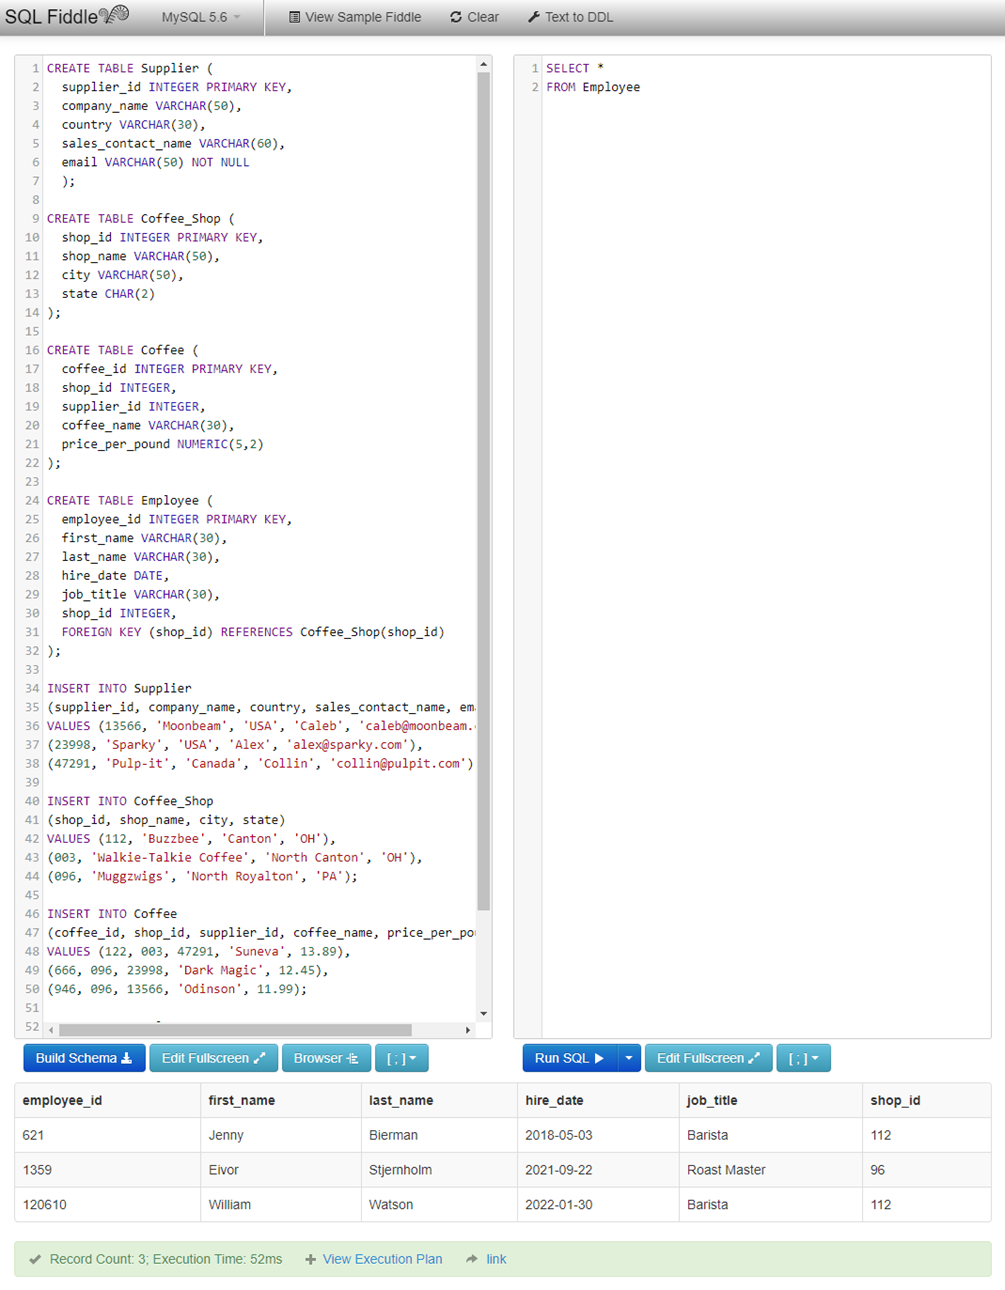

### Creating A View

In [ ]:
SELECT*,
CONCAT(first_name, ' ', last_name) AS employee_full_name
FROM Employee;

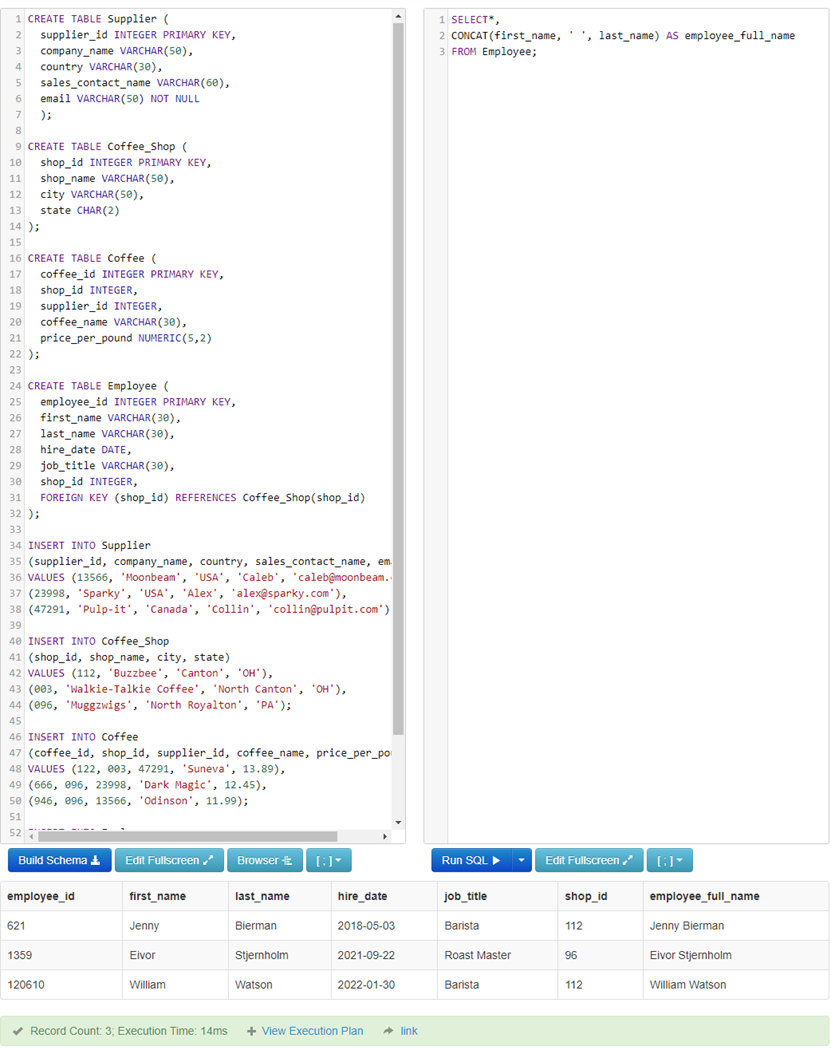

### Creating an Index on coffee_name

CREATE INDEX coffee_name ON Coffee (coffee_name);

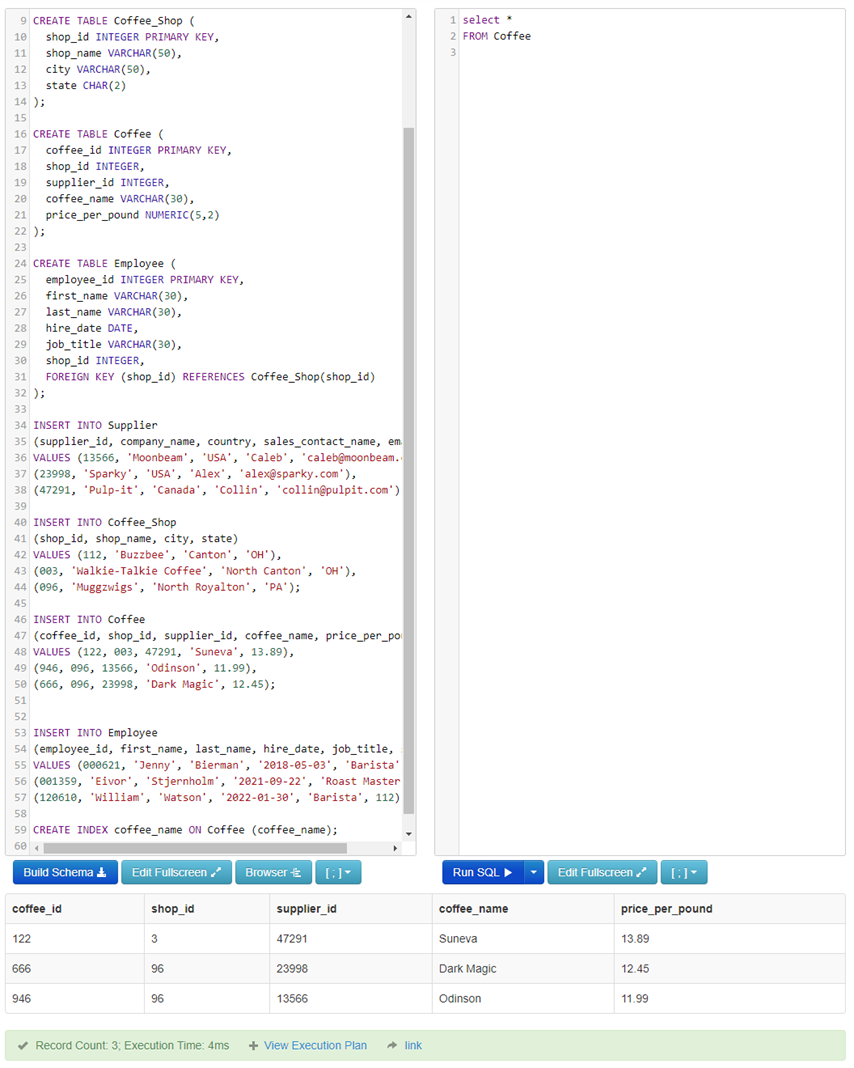

### The "Select-From-Where" Clause

In [ ]:
Select *
From Coffee
WHERE shop_id =  096

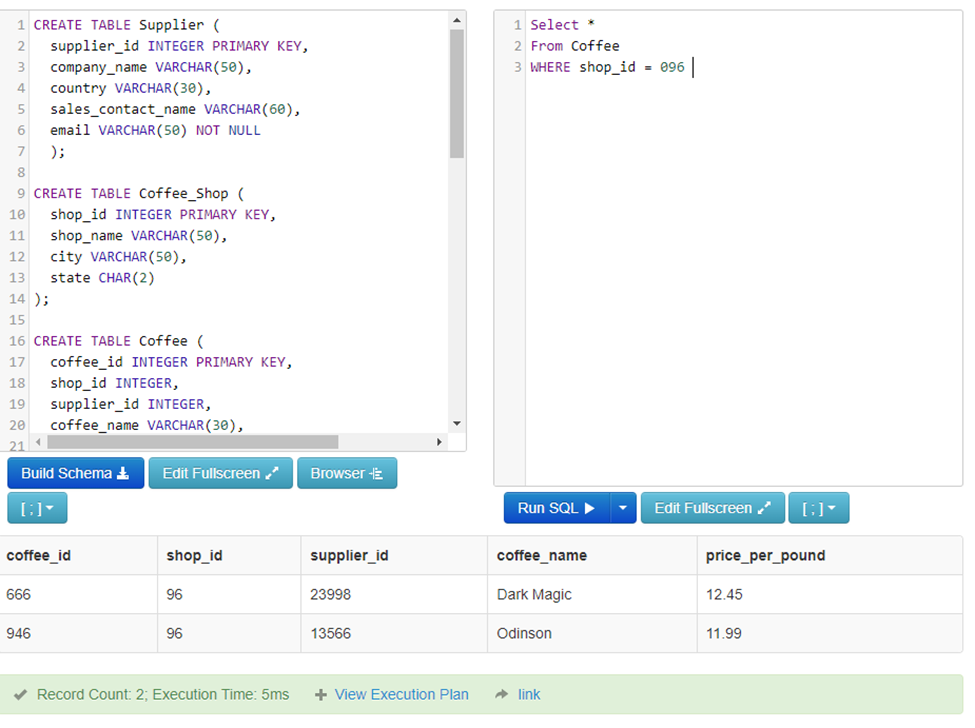

### Creating a Query

In [ ]:
SELECT Employee.first_name, Employee.last_name, Coffee_Shop.shop_name, Coffee.coffee_name
FROM Employee
JOIN Coffee_Shop ON Employee.shop_id = Coffee_Shop.shop_id
JOIN Coffee ON Employee.shop_id = Coffee.shop_id;

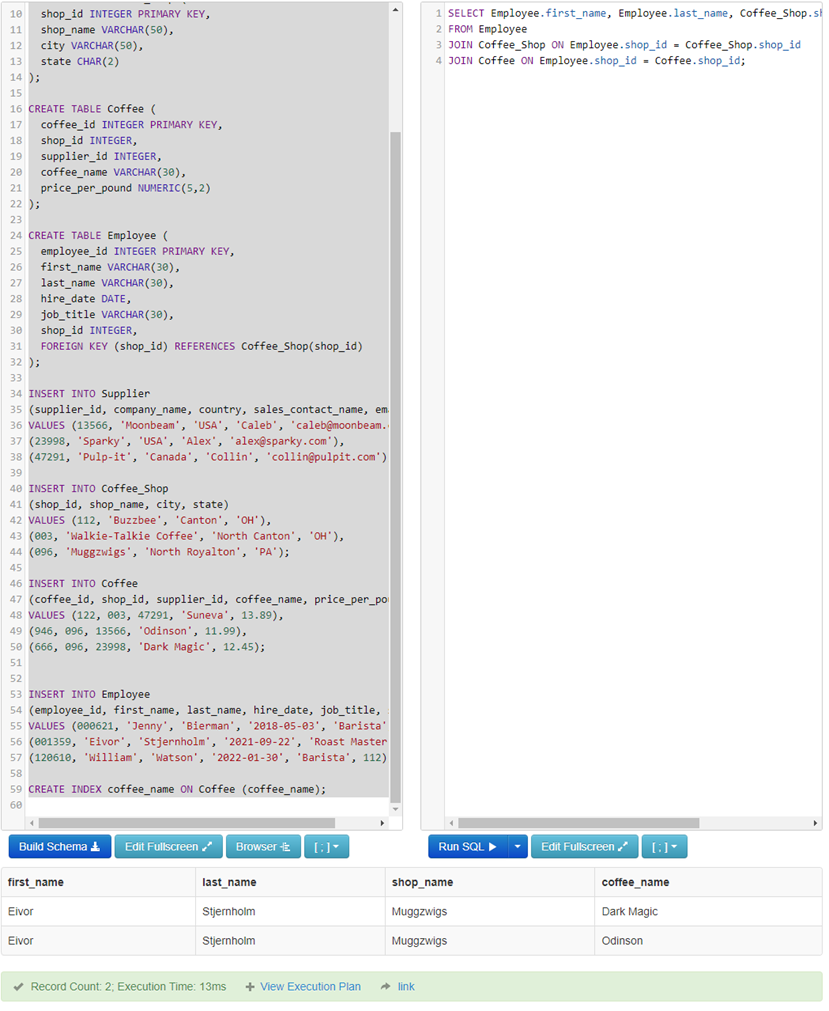